In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#from animate import *
import sys
sys.path.append('../../src/')
from helper_functions import *
plt.style.use('dynamics_site')

## Define Integration Loop

In [2]:
def integrate_rk4(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]
    for i in range(steps-1):
#         k1_via = get_acclerations(rvec,mvec)
#         k1_ria = vvec
#         k2_via = get_acclerations(rvec+(k1_ria*(dt/2)),mvec)
#         k2_ria = vvec+k1_via*(dt/2)
        
#         k3_via = get_acclerations(rvec+(k2_ria*(dt/2)),mvec)
#         k3_ria = vvec+k2_via*(dt/2)
#         k4_via = get_acclerations(rvec+(k3_ria*dt),mvec)
#         k4_ria = vvec+k3_via*(dt)
#         new_vvec_a = vvec + (dt/6)*(k1_via+ 2*k2_via+ 2*k3_via+k4_via)
#         new_rvec_a = rvec + (dt/6)*(k1_ria+ 2*k2_ria+ 2*k3_ria+k4_ria)

        k1_vi = dt*get_acclerations(rvec,mvec)
        k1_ri = dt*vvec        
        
        k2_vi = dt*get_acclerations(rvec +(1/3)*k1_ri,mvec)
        k2_ri = dt*(vvec                 +(1/3)*k1_vi)

        k3_vi = dt*get_acclerations(rvec -(1/3)*k1_ri+(1/1)*k2_ri,mvec)
        k3_ri = dt*(vvec                 -(1/3)*k1_vi+(1/1)*k2_vi)
        
        k4_vi = dt*get_acclerations(rvec +(1/1)*k1_ri-(1/1)*k2_ri+(1/1)*k3_ri,mvec)
        k4_ri = dt*(vvec                 +(1/1)*k1_vi-(1/1)*k2_vi+(1/1)*k3_vi)
        
        new_vvec = vvec + (1/8)*k1_vi + (3/8)*k2_vi + (3/8)*k3_vi + (1/8)*k4_vi
        new_rvec = rvec + (1/8)*k1_ri + (3/8)*k2_ri + (3/8)*k3_ri + (1/8)*k4_ri

        Rs.append(new_rvec)
        Vs.append(new_vvec)
        rvec = new_rvec
        vvec = new_vvec

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE


## Preform Integration

In [3]:
dt = 0.001
steps = 20000
Rs,Vs,Es = integrate_rk4('../../src/Earth-Sun.npy',dt,steps)
xs,ys = Rs[:,:2,0].T
xp,yp = Rs[:,:2,1].T
times = np.linspace(0,steps*dt,steps)

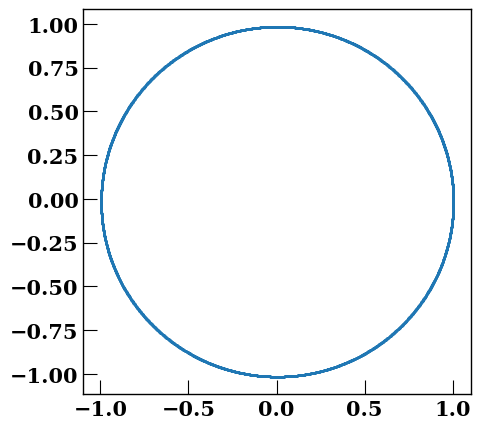

In [4]:
plt.scatter(xp,yp,s=0.1)

## Generate Output 

In [5]:
def makeplot(i):
    xs,ys = Rs[:i,:2,0].T
    xp,yp = Rs[:i,:2,1].T
    relative_error = Es[:i]
    times = np.linspace(0,steps*dt,steps)


    fig,ax = plt.subplots(ncols=2,figsize=(20,10))
    ax[0].scatter(xs[-1],ys[-1],c='k',marker='*',s=100)
    ax[0].plot(xp,yp,c='k',alpha=0.3)
    ax[0].scatter(xp[-1],yp[-1],c='k',s=100)
    ax[0].set_xlabel("X [AU]")
    ax[0].set_ylabel("Y [AU]")
    ax[0].set_xlim(-1.25*np.max(Rs),1.25*np.max(Rs))
    ax[0].set_ylim(-1.25*np.max(Rs),1.25*np.max(Rs))

    ax[1].plot(times[:i],relative_error,c='k')
    ax[1].set_ylabel("Energy(t)")
    ax[1].set_xlabel("Time [yrs]")
    ax[1].set_xlim(0,np.max(times))
    ax[1].set_ylim(np.min(Es),np.max(Es))
    plt.suptitle(r"$\Delta t = 0.001 [yrs]$")
    return fig

In [6]:
# parameter_grid = list(range(1,len(Rs),50)) #plot every 5th timestep
# savefigures(makeplot,parameter_grid,outdir='./rk4/')
# render('./rk4/','rk4','gif',runtime=20)